#Grading Program. 
You need to upload the Scores.csv file as per the following format
https://drive.google.com/file/d/1QF4CAJR__1pOlP_2CrrxxADC92WL8Bl5/view?usp=sharing

This should only contain final list of scores of all your students. Please remove fail candidates with extremely low marks. Those you can mark manually.


This program fits a gaussian curve to your class score distribution and then grades based on the percentile area zones of the gaussian.

The Percentile thersholds can by set by you in the first line of next block as per your grading criteria
For example:

percentile_Thresholds = [95, 80, 65, 45, 25, 5]; 

means students in top 5% Of curve will get A

next 15 percentile (i.e. 95 percentile to 80 percentile will get A-)

next 15 percentile will get B

Next 20 percentile will get B-

Next 20 percentile will get C

Next 20 percentile will get C-

And last 5 percentile will get D

Hit the little arrow in next block to run the program.

Tutorial for usage of this program is here:https://www.youtube.com/watch?v=dCrjSOJdjeQ

Saving Scores.csv to Scores.csv


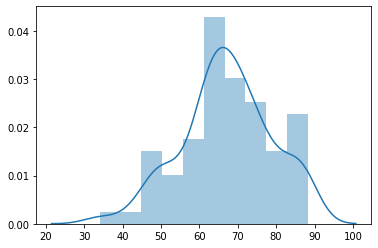

Mean = 67.06773211602739
Std. Dev. = 11.672596690215197
[['69.16666667', 'B-', 7], ['65.72222222', 'B-', 7], ['61.52777778', 'C', 6], ['50.63888889', 'C-', 5], ['86.30555556', 'A', 10], ['34.02777778', 'D', 4], ['84.25', 'A', 10], ['66.36111111', 'B-', 7], ['70.97222222', 'B-', 7], ['79.02777778', 'A-', 9], ['60.97222222', 'C', 6], ['60.55555556', 'C', 6], ['67.08333333', 'B-', 7], ['49.58333333', 'C-', 5], ['65.55555556', 'C', 6], ['73.52777778', 'B', 8], ['45.13888889', 'D', 4], ['66.22222222', 'B-', 7], ['72.52777778', 'B', 8], ['77.52777778', 'A-', 9], ['88.25', 'A', 10], ['86.38888889', 'A', 10], ['67.25', 'B-', 7], ['81.13888889', 'A-', 9], ['49.72222222', 'C-', 5], ['73.02777778', 'B', 8], ['62.61111111', 'C', 6], ['64.08333333', 'C', 6], ['62.52777778', 'C', 6], ['63.30555556', 'C', 6], ['64.30555556', 'C', 6], ['59.02777778', 'C-', 5], ['61.25', 'C', 6], ['77.75', 'A-', 9], ['58.61111111', 'C-', 5], ['75.27777778', 'B', 8], ['80.47222222', 'A-', 9], ['69.61111111', 'B-', 7], [

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
percentile_Thresholds = [90, 80, 65, 45, 25, 5]; #Change your percentile thersholds here
 
from google.colab import files
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
import matplotlib.pyplot as plt
!rm Scores.csv

Scores_File = files.upload()
Scores = np.array(pd.read_csv("Scores.csv", header = None))
sns.distplot(Scores)
plt.show()
M = np.mean(Scores);
S = np.std(Scores)
print('Mean =', M)
print('Std. Dev. =', S)
 
Z_Score = (Scores - M)/S;
 
percentile_Thresholds = np.array(percentile_Thresholds)/100;
pValue_Thresholds = 1-percentile_Thresholds; 
Let_Grades = [];
Num_Grades = [];

Z_Score = (Scores - M)/S;
 
for i in range(0,Scores.size):
  pValue =   scipy.stats.norm.sf(Z_Score[i])
  if(pValue<=pValue_Thresholds[0]):
      Let_Grades.append([str(Scores[i].item()), 'A', 10]);
  elif(pValue<=pValue_Thresholds[1] and pValue>pValue_Thresholds[0]):
      Let_Grades.append([str(Scores[i].item()),'A-', 9]);
  elif(pValue<=pValue_Thresholds[2] and pValue>pValue_Thresholds[1]):
      Let_Grades.append([str(Scores[i].item()),'B', 8]);
  elif(pValue<=pValue_Thresholds[3] and pValue>pValue_Thresholds[2]):
      Let_Grades.append([str(Scores[i].item()),'B-', 7]);
  elif(pValue<=pValue_Thresholds[4] and pValue>pValue_Thresholds[3]):
      Let_Grades.append([str(Scores[i].item()),'C', 6]);
  elif(pValue<=pValue_Thresholds[5] and pValue>pValue_Thresholds[4]):
      Let_Grades.append([str(Scores[i].item()),'C-', 5]);
  else:
      Let_Grades.append([str(Scores[i].item()),'D', 4]);
print(Let_Grades) 
 
df = pd.DataFrame(Let_Grades,columns=['Score', 'Letter Grade', 'Number Grade'])
print("Class average grade is: ", np.mean(df['Number Grade']))
df.to_csv('Grades.csv')
files.download('Grades.csv')